# Análise de Dados do Experimento de Raio X

In [1]:
import pandas as pd
df1 = pd.read_csv('processed_data/eq2_M1_M2_35kV_30graus.csv', decimal=',')
df2 = pd.read_csv('processed_data/eq2_M1_variaçãotensão.csv', decimal=',')

## Parte 1

### Fazer gráfico

In [2]:
df1.head()

,teta,M1/s,M2/s
0,2.5,2,3
1,2.6,0,1
2,2.7,2,2
3,2.8,3,4
4,2.9,2,1


<Figure size 432x288 with 0 Axes>

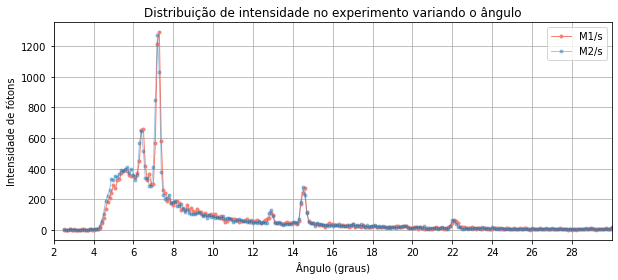

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.gcf()
plt.figure(figsize=(10,4))

plt.plot('teta', 'M1/s', data=df1,
           marker='.', lw=1, color='salmon')
plt.plot('teta', 'M2/s', data=df1,
           marker='.', lw=1, alpha=0.4)

plt.title('Distribuição de intensidade no experimento variando o ângulo')
plt.xlabel('Ângulo (graus)')
plt.ylabel('Intensidade de fótons')
plt.xlim(2,30)
plt.xticks(np.arange(2,30, 2))
plt.legend()
plt.grid()

plt.show()
fig.savefig('fig1.png', bbox_inches='tight')

**Importante: As linhas aqui são apenas para melhorar a visualização, e não representam ajuste algum.**

### Qual a linha característica para $K_\alpha$ e $K_\beta$? Está dentro do esperado?

**Esperado: $K_\alpha\approx17.37keV$, $K_\beta\approx19.59keV$**, ou $K_\alpha\approx2.78\times10^{-15}J$, $K_\beta\approx3.14\times10^{-15}J$

Vemos no gráfico acima alguns picos, separados em duplas. A primeira, que representa a situação onde $n=1$ (da Lei de Bragg) possui o pico menor sendo $K_\alpha$ e o maior sendo $K_\beta$. Da mesma forma, a segunda dupla, próxima de $\theta = 13$, representa a situação onde $n=2$. O pico para $n=3$, próximo de $\theta=22$, é desprezível em nossa amostragem. Para saber se o gráfico está dentro do esperado, vamos transformar o ângulo em energia.

### Passar $\theta$ para energia com a Lei de Bragg

**Lei de Bragg: $n \lambda = 2 d sin(\theta)$**

Mas $E = \frac{hc}{\lambda}$, logo $\lambda=\frac{hc}{E}$, e portanto $ n \frac{hc}{E} = 2d sin(\theta) \Rightarrow E = \frac{nhc}{2d sin(\theta)}$

Sabemos que $d\approx0.282 nm$, $h \approx 6.6\times10^{-34}$, $c \approx 3\times10^8$

Vamos separar em 3 intervalos. Com $\theta<10$, usaremos $n=1$. Com $10<\theta<20$, $n=2$, e com $20<\theta<30$, $n=3$.

#### Fazer gráfico de intensidade x energia

In [4]:
# Conjunto de teta
teta = df1['teta']
t1 = [i for i in teta if i<=10]
t2 = [i for i in teta if (i>10 and i<=20)]
t3 = [i for i in teta if i>20]

In [5]:
# Constantes
h = 6.6e-34
c = 3e8
d = 0.282e-9

In [6]:
# Teta para energia
e1 = [(1*h*c)/(2*d*np.sin(teta*(np.pi/180)))
    for teta in t1]
e2 = [(2*h*c)/(2*d*np.sin(teta*(np.pi/180)))
    for teta in t2]
e3 = [(3*h*c/2*d*np.sin(teta*(np.pi/180)))
    for teta in t3]

<Figure size 432x288 with 0 Axes>

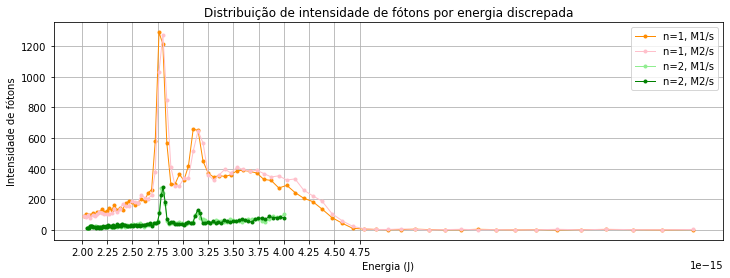

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.gcf()
plt.figure(figsize=(12,4))

plt.plot(e1, df1[df1['teta']<=10]['M1/s'],
           marker='.', lw=1, color='darkorange',
        label='n=1, M1/s')
plt.plot(e1, df1[df1['teta']<=10]['M2/s'],
           marker='.', lw=1, color='pink',
        label='n=1, M2/s')
plt.plot(e2, df1[(df1['teta']>10) & (df1['teta']<=20)]['M1/s'],
           marker='.', lw=1, color='lightgreen',
        label='n=2, M1/s')
plt.plot(e2, df1[(df1['teta']>10) & (df1['teta']<=20)]['M2/s'],
           marker='.', lw=1, color='green',
        label='n=2, M2/s')

plt.title('Distribuição de intensidade de fótons por energia discrepada')
plt.xlabel('Energia (J)')
plt.ylabel('Intensidade de fótons')
plt.xticks(np.arange(2,5,0.25)*1e-15)
plt.legend()
plt.grid()

plt.show()
fig.savefig('fig2.png', bbox_inches='tight')

**Nota: Não foi plotado os resultados para n=3 pois os dados estão expúrios e o cálculo realizado para esta série não foram satisfatórios**

Os dados obtidos estão dentro do esperado.

### Calcular Incerteza

Sendo $\sigma(I) = \sqrt{I}$

<p style='color:red;'><b>Próxima semana</b></p>

## Parte 2

## Fazer gráfico de intensidade x energia

In [8]:
df2.head()

,teta,35kV,30kV,28kV,25kV,18kV
0,2.5,2,0,1,1,0
1,2.6,2,0,3,0,0
2,2.7,2,0,0,0,0
3,2.8,3,1,1,2,1
4,2.9,2,0,0,0,0


<Figure size 432x288 with 0 Axes>

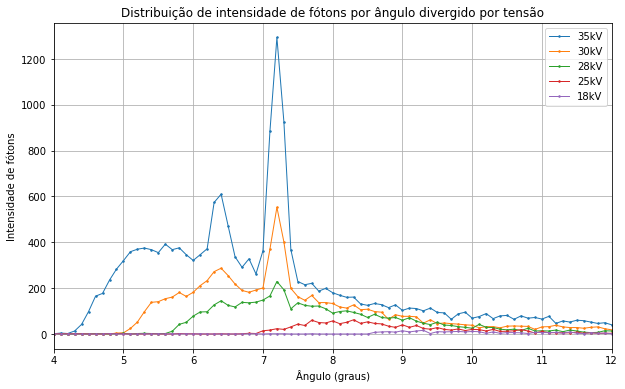

In [9]:
fig = plt.gcf()
plt.figure(figsize=(10,6))

plt.plot('teta', '35kV', data=df2,
        marker='.', lw=1, markersize=3)
plt.plot('teta', '30kV', data=df2,
        marker='.', lw=1, markersize=3)
plt.plot('teta', '28kV', data=df2,
        marker='.', lw=1, markersize=3)
plt.plot('teta', '25kV', data=df2,
        marker='.', lw=1, markersize=3)
plt.plot('teta', '18kV', data=df2,
        marker='.', lw=1, markersize=3)

plt.title('Distribuição de intensidade de fótons por ângulo divergido por tensão')
plt.xlabel('Ângulo (graus)')
plt.ylabel('Intensidade de fótons')
plt.xlim(4,12)
plt.grid()
plt.legend()

plt.show()
fig.savefig('fig1.png', bbox_inches='tight')

Transformaremos o ângulo em energia considerando que $E = \frac{nhc}{2dsin(\theta)}$, sabendo que $n=1$.

In [10]:
# Transformar theta em energia
ep2 = [(1*h*c)/(2*d*np.sin(teta*(np.pi/180)))
    for teta in df2['teta']]

<Figure size 432x288 with 0 Axes>

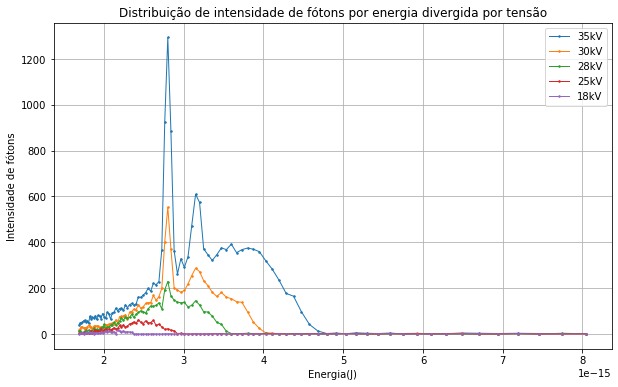

In [11]:
fig = plt.gcf()
plt.figure(figsize=(10,6))

plt.plot(ep2, df2['35kV'], label='35kV',
        marker='.', lw=1, markersize=3)
plt.plot(ep2, df2['30kV'], label='30kV',
        marker='.', lw=1, markersize=3)
plt.plot(ep2, df2['28kV'], label='28kV',
        marker='.', lw=1, markersize=3)
plt.plot(ep2, df2['25kV'], label='25kV',
        marker='.', lw=1, markersize=3)
plt.plot(ep2, df2['18kV'], label='18kV',
        marker='.', lw=1, markersize=3)

plt.title('Distribuição de intensidade de fótons por energia divergida por tensão')
plt.xlabel('Energia(J)')
plt.ylabel('Intensidade de fótons')
plt.grid()
plt.legend()

plt.show()
fig.savefig('fig1.png', bbox_inches='tight')

## Como determinar $K_\alpha$ e $K_\beta$?

**Para determinar estes valores, vamos considerar os valores aparentes dos picos para as três primeiras séries. Visualmente, temos $K_\alpha\approx2.7\times10^{-15}J$, $K_\beta\approx3.2\times10^{-15}J$. O resultado está próximo do que calculamos na parte 1 do experimento. Os dados de 25kV e 18kV não foram considerados pois as energias são muito baixas para grande intensidade de raios X (considerando que os elétrons necessitam de 20kV para aceleraram no aparato experimental).**

## Determinar $\lambda_{min}$ e calcular $h$.

Sabendo que $n\lambda = 2d sin (\theta)$, temos $\lambda=2dsin(\theta)/n$

Pelo gráfico acima, temos os valores para $\theta_{min}$: <br>
$35kV: 4.25$ <br>
$30kV: 5.0$ <br>
$28kV: 5.6$ <br>
$25kV: 7.0$ <br>

<Figure size 432x288 with 0 Axes>

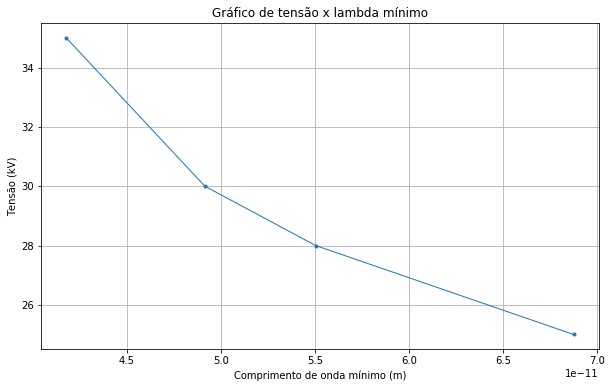

In [12]:
# Calcular lambda_min e estabelecer energia máxima
l = [(2*d*np.sin(teta*(np.pi/180))) for teta in [4.25, 5, 5.6, 7]]
em = [35,30,28,25]
#em = [(1*h*c)/(2*d*np.sin(teta*(np.pi/180))) for teta in [4.25, 5, 5.6, 7]]

fig = plt.gcf()
plt.figure(figsize=(10,6))

plt.plot(l, em,
        marker='.', lw=1)

plt.title('Gráfico de tensão x lambda mínimo')
plt.xlabel('Comprimento de onda mínimo (m)')
plt.ylabel('Tensão (kV)')
plt.grid()

plt.show()
fig.savefig('fig3.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

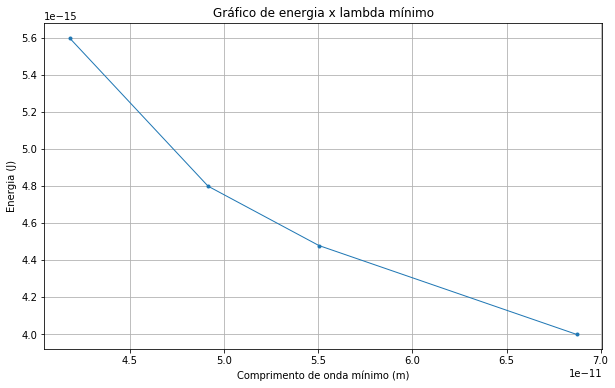

In [48]:
# Gráfico de Energia x Comprimento de onda
em = [i*1e3*1.6e-19 for i in [35,30,28,25]]

fig = plt.gcf()
plt.figure(figsize=(10,6))

plt.plot(l, em,
        marker='.', lw=1)

plt.title('Gráfico de energia x lambda mínimo')
plt.xlabel('Comprimento de onda mínimo (m)')
plt.ylabel('Energia (J)')
plt.grid()

plt.show()
fig.savefig('fig3.png', bbox_inches='tight')

In [49]:
import scipy
from scipy import optimize

def func(x, h):
    return h*3e8/x

popt, pcov = scipy.optimize.curve_fit(func, l, em)
popt

array([8.0978946e-34])